# File processing

In [16]:
import shutil
import os

class FileProcessing:
  def __init__(self, files):
    self.FILES = files

  def process_files(self):
    for file in self.FILES:
      self._clear_file(file)

  def _clear_file(self, file_name):
    raw_file_path = FileProcessing.get_file_path(file_name)
    processed_file_path = FileProcessing.get_file_path(f'{file_name}-processed')

    shutil.copyfile(raw_file_path, processed_file_path)

    with open(raw_file_path, "r+") as raw_file:
      for _ in range(4):
        raw_file.readline()

      with open(processed_file_path, "w") as processed_file:
        for row in raw_file:
          processed_file.write(row)
      
  @classmethod
  def get_file_path(self, file_name):
    return os.path.join('..', '..', 'data', f"{file_name}.txt")

  

In [17]:
FILES = ["email-EuAll", "roadNet-PA", "ca-HepTh", "p2p-Gnutella09"]
file_processing = FileProcessing(FILES)
file_processing.process_files()

# Requirement II

For each of the chosen networks, develop a bipartite graph about sortativity in relation to the degree of network nodes. figures in a grid layout.

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import re

class BipartiteGraphGeneratorAboutTurnover:
  def __init__(self, file):
    self.file = open(FileProcessing.get_file_path(file), 'r')
    self.rows = self.file.readlines()

    self.G = nx.Graph()
    self.H = None
  
  def generate_graph(self):
    self._add_edges()
    
    self.H = nx.DiGraph(self.G)
    self.file.close()

    return self.G

  def get_bipartite_chart_data(self):
    degree, avg_neighbor_degree = zip(*nx.average_degree_connectivity(self.G).items())
    return list(degree), list(avg_neighbor_degree)

  def _add_edges(self):
    for row in self.rows:
      row = row.rstrip()
      nodes = row.split()
      self.G.add_edge(int(nodes[0]), int(nodes[1]))

In [19]:
class Plotter:
  def __init__(self, files):
    self.files = files
    self.figure, self.axs = plt.subplots(2, 3, figsize=(30, 15))
    self.style = "fivethirtyeight"
    self.ylabel = "Average neighbor degree"
    self.xlabel = "Node Degree"

  def plot(self):
    counter = 0
    for file in self.files:
      chart = BipartiteGraphGeneratorAboutTurnover(file)
      chart.generate_graph()

      degree, avg_neigh_degree = chart.get_bipartite_chart_data()

      plt.style.use(self.style)

      sns.regplot(x=degree, y=avg_neigh_degree, ax=self.axs[counter//3, counter%3])

      self.axs[counter//3, counter%3].set_title(self._normalize_title(file))
      self.axs[counter//3, counter%3].set_xlabel(self.xlabel)
      self.axs[counter//3, counter%3].set_ylabel(self.ylabel)
      self.axs[counter//3, counter%3].set_xlim(0, len(degree))

      counter += 1

  def _normalize_title(self, file):
    return ' '.join([word.title() for word in re.split(r'[-_]', file)])

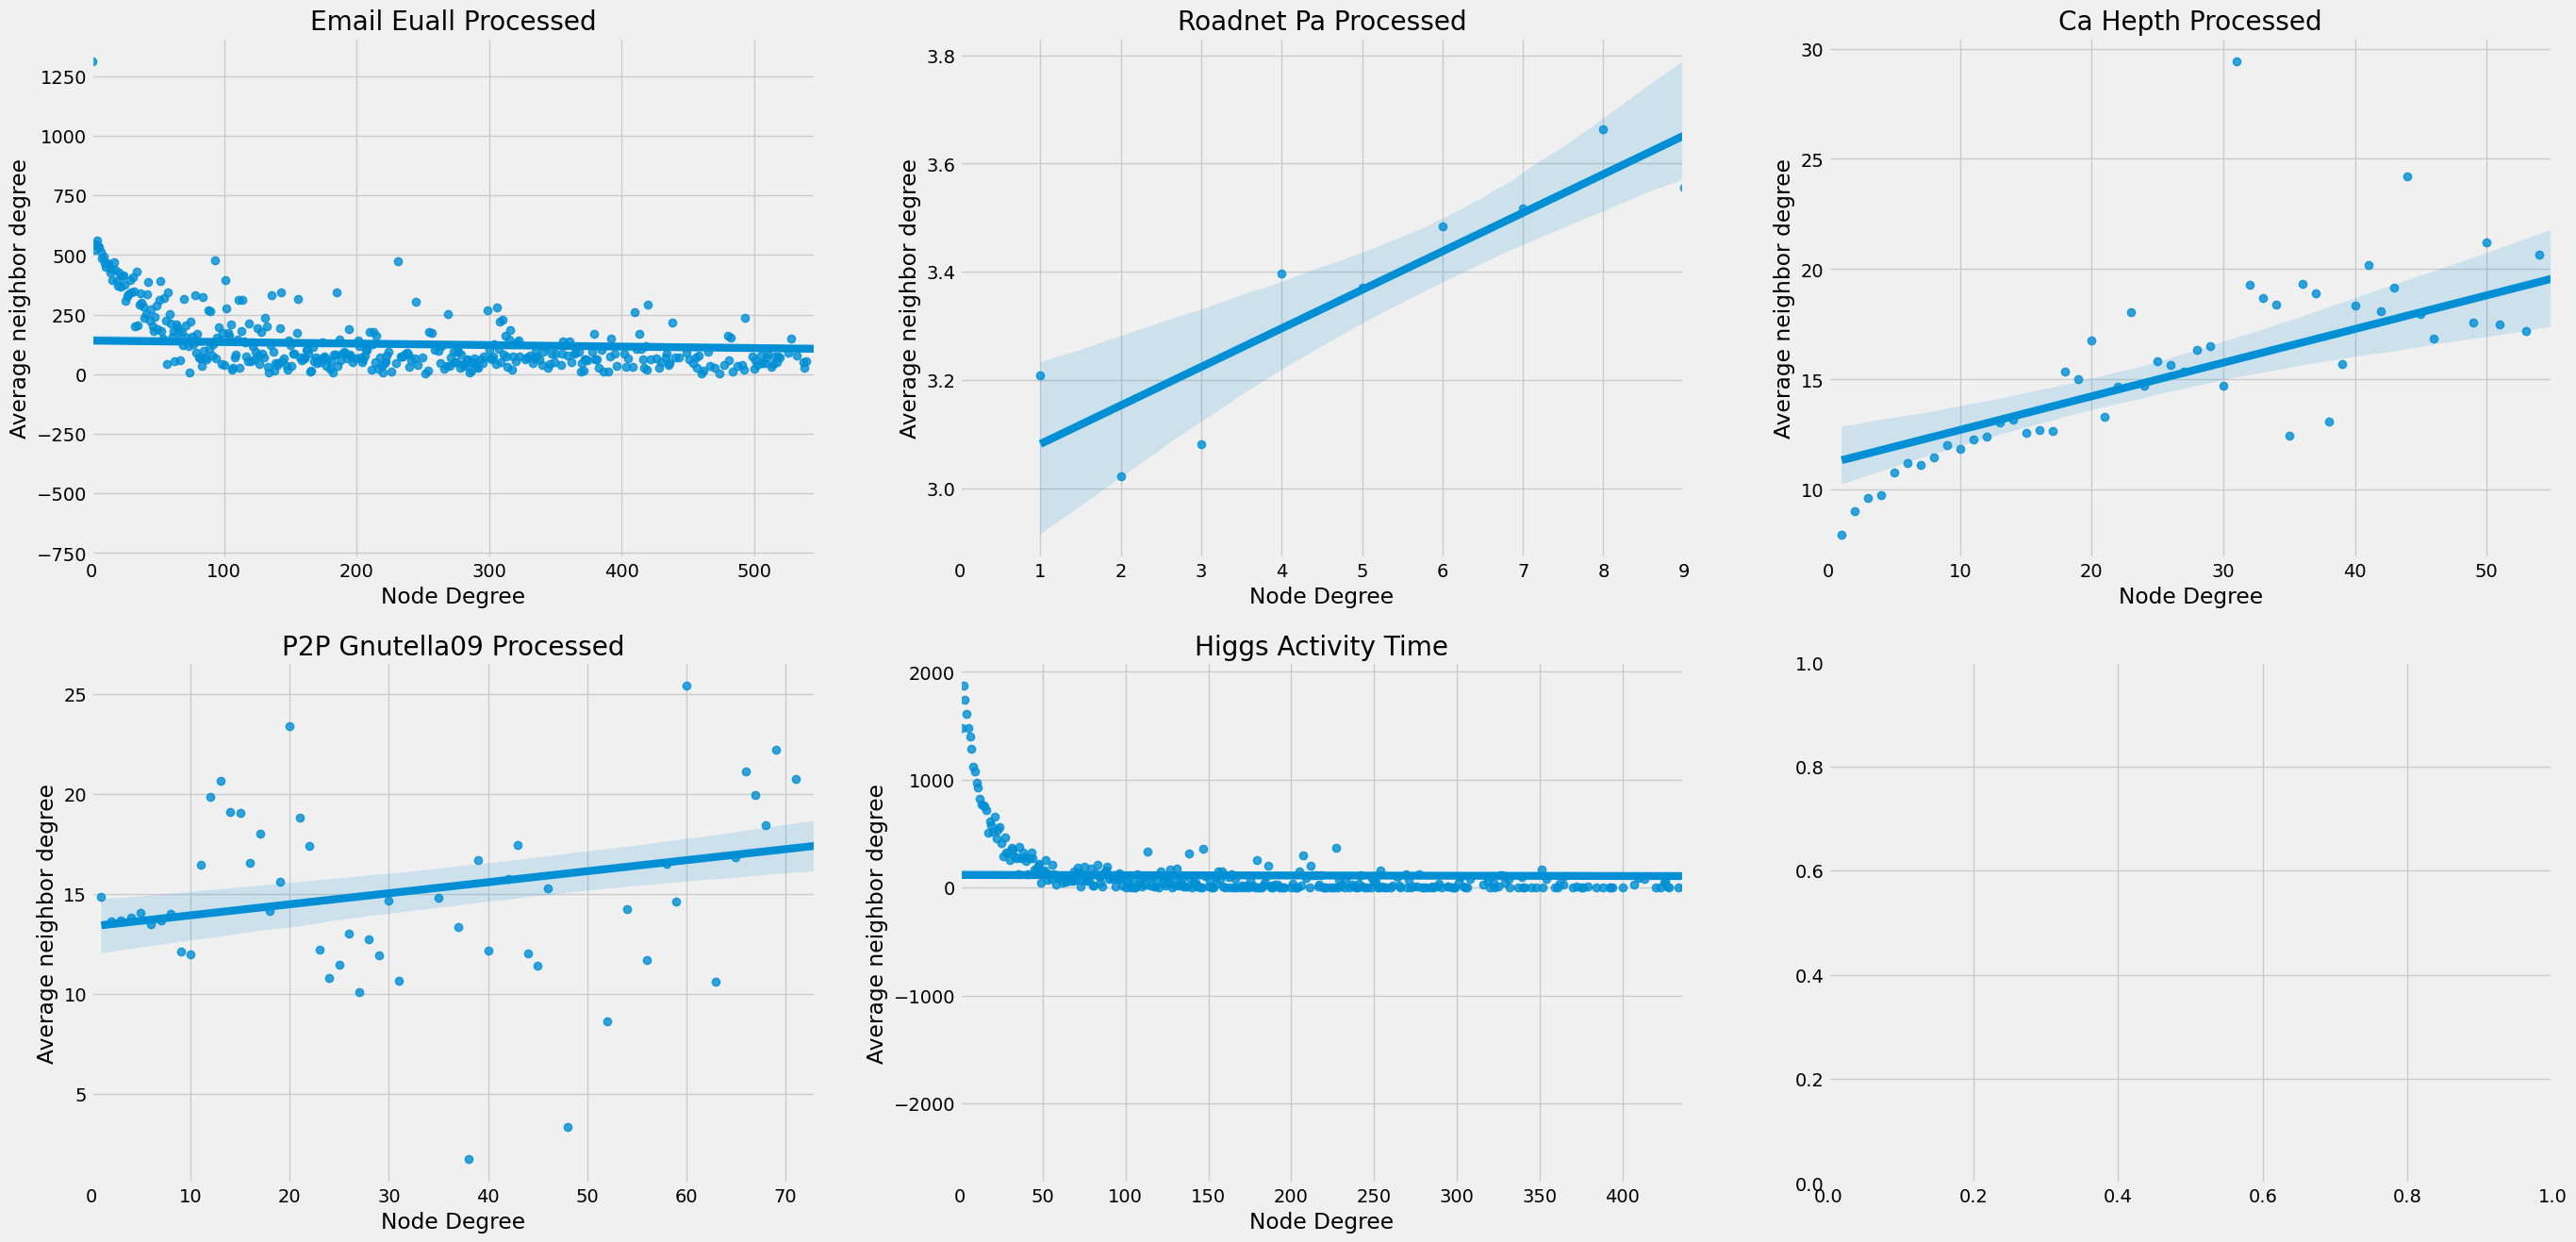

In [20]:
FILES = [
  "email-EuAll-processed",
  "roadNet-PA-processed",
  "ca-HepTh-processed",
  "p2p-Gnutella09-processed",
  "higgs-activity_time"
]

plotter = Plotter(FILES)
plotter.plot()